[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0061 - val_loss: 9.7047e-04
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.6268e-04 - val_loss: 0.0015
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.1815e-04 - val_loss: 0.0012
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3.5968e-04 - val_loss: 0.0023
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 4.7661e-04 - val_loss: 0.0061
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 4.8351e-04 - val_loss: 0.0028
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3.3847e-04 - val_loss: 0.0031
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 4.4712e-04 - val_loss: 0.0016
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3.3590e-04 - val_loss: 9.0069e-04
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 2.9272e-04 - val_loss: 9.7730e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step 


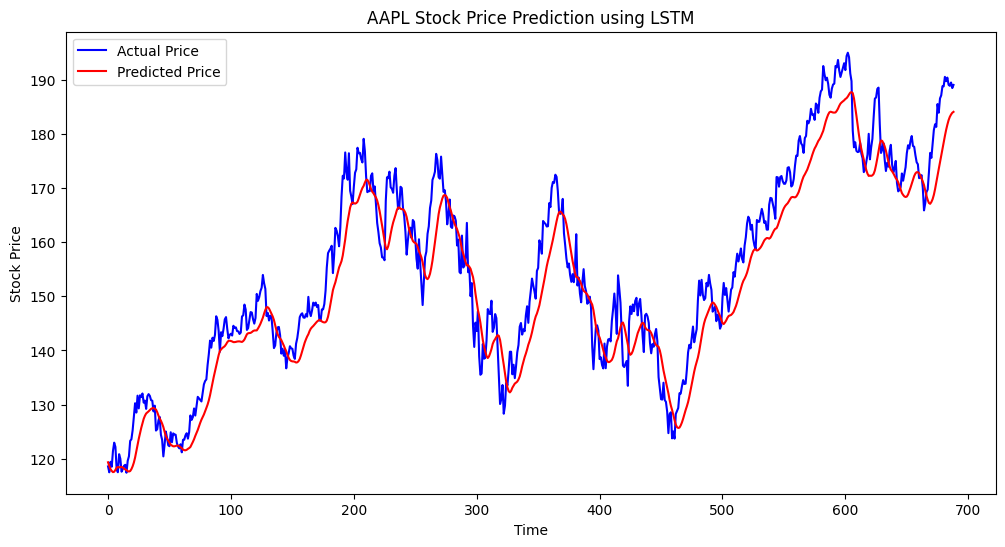

Mean Squared Error: 34.97883549941256


In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Data Collection: Download historical stock data
ticker = 'AAPL'  # Example: Apple stock (you can replace with any ticker)
start_date = '2010-01-01'
end_date = '2023-12-01'

# Download stock data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# 2. Data Preprocessing: Normalize and prepare data
# We'll use the 'Close' price for prediction
data = data[['Close']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences of data for training (e.g., past 60 days)
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])  # Past 60 days as input
    y.append(data_scaled[i, 0])  # Current price as the output

X = np.array(X)
y = np.array(y)

# Reshape X to 3D for LSTM input: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. Model Building: LSTM model
model = Sequential()

# Add LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout for regularization

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add Dense output layer (1 unit for predicting the stock price)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 5. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 6. Evaluate the model and make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the test labels to get actual prices
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Model evaluation (Mean Squared Error or another metric)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_actual, predictions)
print(f'Mean Squared Error: {mse}')